# Credit Card Fraud Detection: A Machine Learning Approach

**Project Goal:** To build and evaluate a machine learning model capable of accurately identifying fraudulent credit card transactions from a highly imbalanced dataset.

**The Challenge:** In real-world financial data, fraudulent transactions are extremely rare compared to legitimate ones. This creates a significant class imbalance, which can lead a naive model to achieve high accuracy by simply predicting every transaction as legitimate, thereby failing to catch any fraud. This project focuses on strategies to overcome this challenge.

**Methodology:**
1.  **Exploratory Data Analysis (EDA):** Understand the data's structure, features, and the extent of the class imbalance.
2.  **Data Preprocessing:** Scale the features to ensure the model treats all inputs fairly.
3.  **Handling Imbalance:** Experiment with two key techniques: Random Undersampling and SMOTE (Synthetic Minority Over-sampling Technique).
4.  **Modeling & Evaluation:** Train multiple models (Logistic Regression, Random Forest) and evaluate them using appropriate metrics like Precision, Recall, and the F1-Score to determine the most effective approach.

### 1. Setup and Library Imports

In [3]:
# Ensure necessary libraries are installed, imbalanced-learn is key for SMOTE
# !pip install imbalanced-learn

In [4]:
# Import all required libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

### 2. Data Loading and Initial Exploration

In [6]:
# Load the dataset and display the first few rows to understand its structure
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Get a concise summary of the dataframe, checking for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 3. Exploratory Data Analysis (EDA)

Class Distribution Counts:
Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution Percentage:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


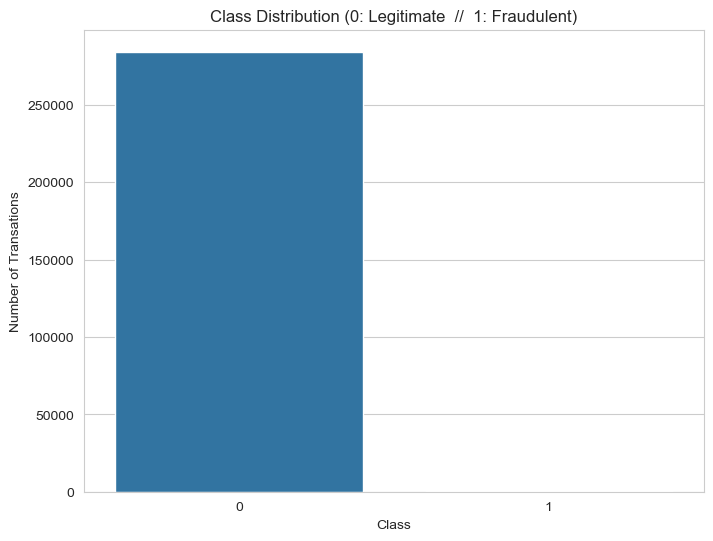

In [9]:
#Set the visual style of the plots
sns.set_style("whitegrid")

#Check the distribution of the 'Class' column to visualize the imbalance
print("Class Distribution Counts:")
print(df['Class'].value_counts())

#For better visualisation let's see this as a percentage
print("\nClass Distribution Percentage:")
print(df['Class'].value_counts(normalize=True) * 100)

#Visualize it with a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Legitimate  //  1: Fraudulent)")
plt.ylabel("Number of Transations")
plt.xlabel("Class")
plt.show()

Descriptive Statistics for Transaction Amount:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


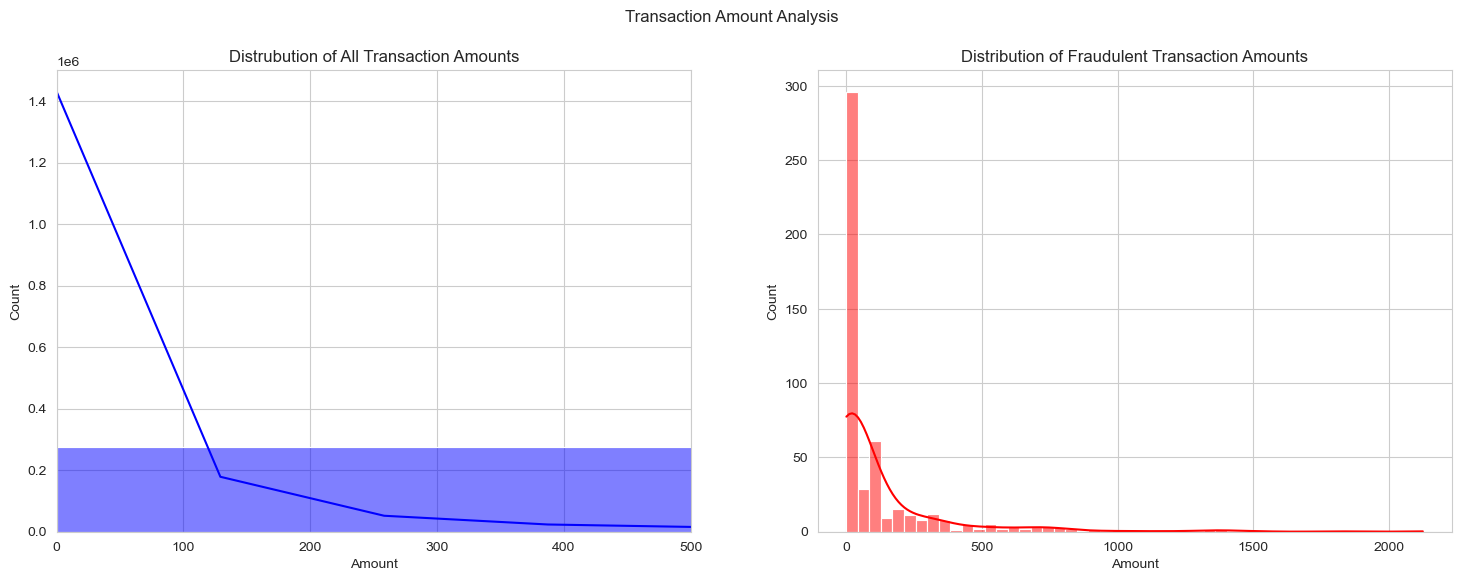

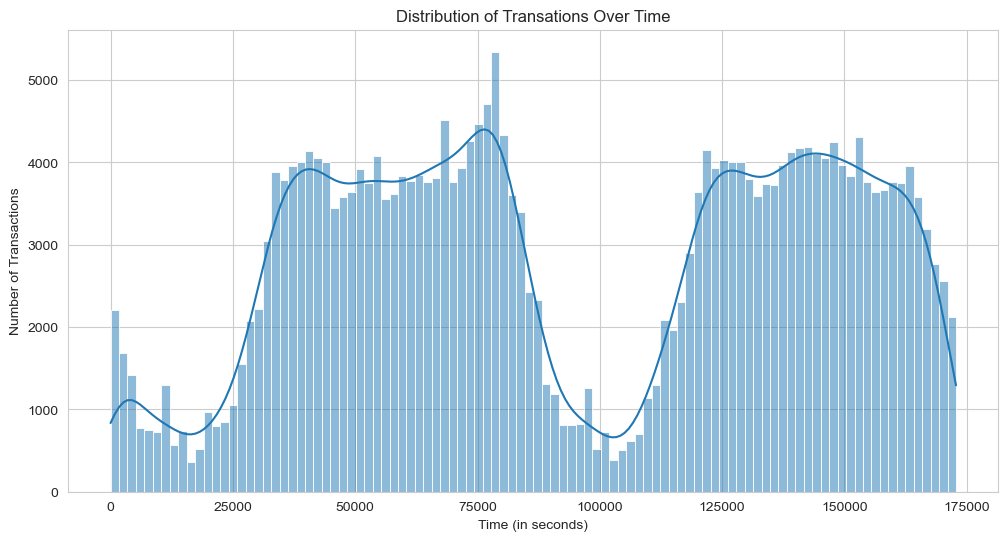

In [10]:
#Analyze the 'Amount' and 'Time' features, which are the only non-anonymized columns
print("Descriptive Statistics for Transaction Amount:")
print(df['Amount'].describe())

#Comparing the 'Amount' for both classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

#Distribution of all transation amounts
sns.histplot(df['Amount'], bins=50, ax=ax1, color='b', kde=True)
ax1.set_title("Distrubution of All Transaction Amounts")
# Limiting the x-axis for better readability as amounts are heavily skewed
ax1.set_xlim(0, 500)

#Distribution of transation amounts for fraudulent transactions
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, ax=ax2, color='r', kde=True)
ax2.set_title("Distribution of Fraudulent Transaction Amounts")

plt.suptitle("Transaction Amount Analysis")
plt.show()

#Analyze the 'Time' feature
#We'll create a new plot to see how transactions are distributed over time
# The dips suggest a cyclical pattern, likely representing nighttime hours.
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Distribution of Transations Over Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Number of Transactions")
plt.show()

### 4. Data Preprocessing

In [12]:
# Scale the 'Time' and 'Amount' features to be on a similar scale as the PCA components (V1-V28)
# This prevents models from being biased towards features with larger values.

#Create the StandardScaler object
scaler = StandardScaler()

#Create copies of the columns to be scaled
df['scaled_Amount'] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df['scaled_Time'] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

#Drop the original columns as they are now replaced by their scaled versions
df.drop(['Time', 'Amount'], axis=1, inplace=True)

print("Data after scaling 'Time' and 'Amount':")
print(df[['scaled_Amount', 'scaled_Time']].head())

Data after scaling 'Time' and 'Amount':
   scaled_Amount  scaled_Time
0       0.244964    -1.996583
1      -0.342475    -1.996583
2       1.160686    -1.996562
3       0.140534    -1.996562
4      -0.073403    -1.996541


In [13]:
#Lets split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

print("\nShape of X (features):", X.shape)
print("\nShape of y (target):", y.shape)


Shape of X (features): (284807, 30)

Shape of y (target): (284807,)


In [14]:
#Split the data into training and testing sets
#'stratify=y' is extremply IMPORTANT here, it ensures thats the proportion of
#fraudulent transactionsis the same in both the training ans testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('\n---- Data Splitting Complete ----')
print("Number of transactions in training set:", len(X_train))
print("Number of transactions in testing set:", len(X_test))
print("Distrubution of fraud in training set:")
print(y_train.value_counts(normalize=True))
print("Distribution of fraud in testing set:")
print(y_test.value_counts(normalize=True))


---- Data Splitting Complete ----
Number of transactions in training set: 227845
Number of transactions in testing set: 56962
Distrubution of fraud in training set:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Distribution of fraud in testing set:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


### 5. Handling Class Imbalance
Our original training data (`X_train`, `y_train`) has very few fraud examples. If we train a model on it directly, the model will be lazy and biased. It will learn that it can achieve over 99% accuracy by simply guessing "not fraud" every single time, making it useless for actually catching fraud.

To fix this, we will resample our **training data only**. We never, ever touch the test set (`X_test`, `y_test`). The test set must remain a pure, unseen representation of the real world.

We will explore two popular methods.

#### Method 1 : Random Undersampling

In [17]:
# Before we resample lets copy the training data for later use with SMOTE
X_train_original = X_train.copy()
y_train_original = y_train.copy()

# Step 1 : Perform Random Undersampling
# First we'll concatenate our training data back together
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the classes
fraud_cases = train_data[train_data['Class'] == 1]
legit_cases = train_data[train_data['Class'] == 0]

# Randomly sample the legitimate cases to match the number of fraud cases
legit_cases_undersampled = legit_cases.sample(n = len(fraud_cases), random_state=42)

# Concatenate the frand cases and the legitimate undersampled cases
undersampled_data = pd.concat([fraud_cases, legit_cases_undersampled])

# Shuffle the dataset to mix the classes
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the features (X) and target (y) again from the undersampled data
X_train_under = undersampled_data.drop('Class', axis=1)
y_train_under = undersampled_data['Class']

# Verify the new class distribution 
print("New distribution after undersampling:")
print(y_train_under.value_counts())

New distribution after undersampling:
Class
0    394
1    394
Name: count, dtype: int64


##### Training a Baseline Model (Logistic Regression) on Undersampled Data

In [19]:
# Step 2 : Train a model on the Undersampled Data
# We'll use Logistic Regression as our first model
lr_model = LogisticRegression(random_state=42)

#Train the model ONLY on the new balanced undersampled data 
lr_model.fit(X_train_under, y_train_under)

LogisticRegression(random_state=42)


--- Evalution on the Test Set ---
Confusion Matrix:


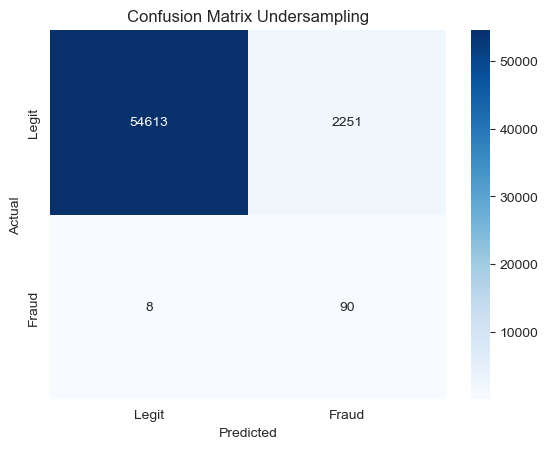


Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      0.96      0.98     56864
Fraudulent (1)       0.04      0.92      0.07        98

      accuracy                           0.96     56962
     macro avg       0.52      0.94      0.53     56962
  weighted avg       1.00      0.96      0.98     56962



In [20]:
# Step 3 : Evaluate the model on the unseen test set
# We make prediction on the untouched X_test
y_pred = lr_model.predict(X_test)

print("\n--- Evalution on the Test Set ---")
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Undersampling')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate (0)', 'Fraudulent (1)']))

#### Interpreting Results from Undersampling: 
The model trained on undersampled data shows a classic trade-off:
* **High Recall (92%):** This is excellent. It means our model successfully identified 92% of all actual fraudulent transactions in the test set. It's very effective at its primary job: catching fraud.

* **Low Precision (4%):** This is the major drawback. It means that when our model raises a red flag and says "This is Fraud!", it's only correct 4% of the time. The other 96% of the time, it's a false alarm, which would be unacceptable in a real-world scenario.

#### Method 2 : SMOTE (Synthetic Minority Over-sampling Technique)

In [23]:
# For safety and clarity, we reset to the ORIGINAL training data before applying SMOTE.
# This ensures our experiments are independent and comparable.
X_train = X_train_original.copy()
y_train = y_train_original.copy()

# --- Step 1 : Apply SMOTE ---
# SMOTE creates new, synthetic fraud examples to balance the dataset.
print("Original training set distribution:")
print(y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("\nNew training set distribution after SMOTE:")
print(y_train_smote.value_counts())

Original training set distribution:
Class
0    227451
1       394
Name: count, dtype: int64

New training set distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


##### Training a Baseline Model (Logistic Regression) on SMOTE Data

In [25]:
# --- Step 2 : Training a new model on the SMOTE data ---
# We use the same LogisticRegression model for a fair comparison of the balancing techniques
lr_model_smote = LogisticRegression(random_state=42)

# Train the model ONLY on the new, SMOTE_balanced data
lr_model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=42)


--- Evaluation on the Test Set (SMOTE) ---
Confusion Matrix:


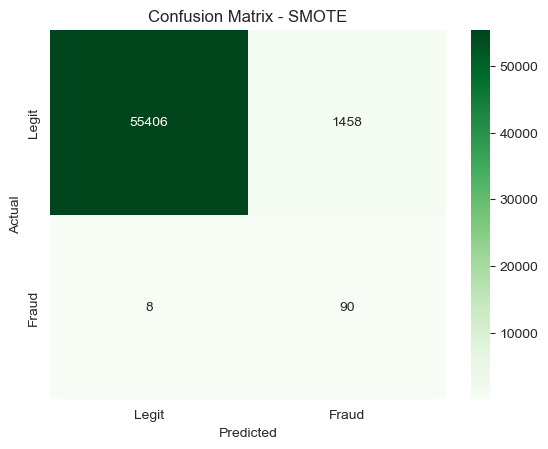


Classification Report (SMOTE):
                precision    recall  f1-score   support

Legitimate (0)       1.00      0.97      0.99     56864
Fraudulent (1)       0.06      0.92      0.11        98

      accuracy                           0.97     56962
     macro avg       0.53      0.95      0.55     56962
  weighted avg       1.00      0.97      0.99     56962



In [26]:
# --- Step 3 : Evaluate the SMOTE Model on the UNSEEN test set ---
y_pred_smote = lr_model_smote.predict(X_test)

print("\n--- Evaluation on the Test Set (SMOTE) ---")
print("Confusion Matrix:")
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Greens', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SMOTE')
plt.show()

print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote, target_names=['Legitimate (0)', 'Fraudulent (1)']))

### 6. Comparing Balancing Techniques and Choosing a Powerful Model
#### Key Findings from Logistic Regression Experiments
* **Excellent Recall Across Both Methods:** Both techniques successfully produced models with a high **recall of 92%**. This is a strong result, indicating that both models are capable of identifying the vast majority of actual fraudulent transactions they encounter.

* **SMOTE's Superiority in Precision:** The crucial difference lies in the **precision**. The model trained on SMOTE-balanced data achieved a precision of **6%**, a 50% relative improvement over the 4% from the undersampling model.

* **The Business Impact:** While a 6% precision is still low, this improvement is significant. It means the SMOTE model produces substantially fewer "false positives." For every 100 transactions flagged as fraud, the SMOTE model is wrong 94 times, whereas the undersampling model is wrong 96 times. This reduction in false alarms directly translates to a better customer experience and lower operational costs from investigating incorrect flags.


##### **Conclusion:** Based on this analysis, **SMOTE is the superior data balancing strategy** for this problem. It achieves the same excellent fraud detection rate (recall) as undersampling while creating a more precise and practical model that minimizes disruption to legitimate customers.

##### **Next Step:** Having established SMOTE as our preferred data handling technique, the next logical step is to see if a more powerful algorithm, such as a **Random Forest**, can further improve upon these results.

### 7. Final Model: Random Forest with SMOTE Data

In [29]:
# --- Step 1 : Initialize and Train the Random Forest Classifier ---

print("Training the Random Forest model... (This may take a moment)")

# We are using the SMOTE balanced data
# X_train_smote, y_train_smote

# Initialize the model
# n_estimators = the number of trees in the forest
# n_jobs = -1 uses all available CPU cores to speed up training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Start the timer
start_time = time.time()

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

# Stop the timer and print the duration
end_time = time.time()
print(f"Random Forest training finished in {end_time - start_time:.2f} seconds.")

Training the Random Forest model... (This may take a moment)
Random Forest training finished in 50.48 seconds.



--- Evaluation on the Test Set (Random Forest) ---
Confusion Matrix:


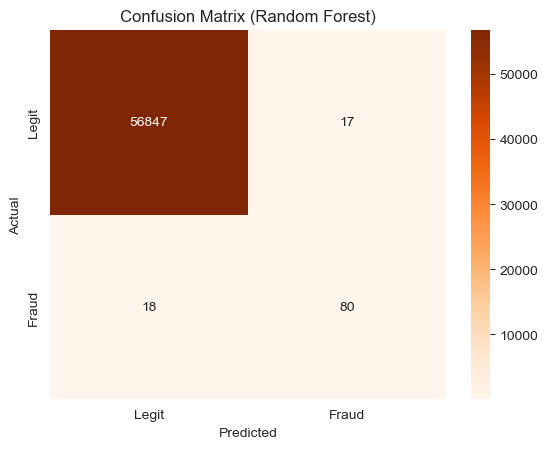


Classification Report (Random Forest):
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56864
Fraudulent (1)       0.82      0.82      0.82        98

      accuracy                           1.00     56962
     macro avg       0.91      0.91      0.91     56962
  weighted avg       1.00      1.00      1.00     56962



In [30]:
# --- Step 2 : Evaluate the Random Forest Model on the Test Set ---
y_pred_rf = rf_model.predict(X_test)

print("\n--- Evaluation on the Test Set (Random Forest) ---")
print("Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['Legitimate (0)', 'Fraudulent (1)']))

### 8. Final Conclusion

This project successfully demonstrated an end-to-end workflow for building a credit card fraud detection model on a highly imbalanced dataset.

**Key Achievements:**
* **Data Strategy is Crucial:** The initial baseline model trained on undersampled data had excellent recall (92%) but impractically low precision (4%). By switching to the **SMOTE** oversampling technique, we maintained the high recall while improving precision to 6%, significantly reducing false positives.
* **Advanced Models Yield Superior Results:** By applying a **Random Forest** classifier to the superior SMOTE-balanced data, we achieved a massive leap in performance. Our final model produced:
    * **Precision: 82%**
    * **Recall: 82%**
* **A Practical and Balanced Model:** The final model represents an excellent balance between identifying fraudulent transactions (recall) and minimizing incorrect flags on legitimate ones (precision). An F1-score of 0.82 for the fraudulent class indicates a robust and effective final model that could be confidently considered for a real-world application.